In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3
from utils.visualization import scatter_data, scatter3d_data, visualization_2d, visualization_3d
from utils.preprocessing import scale_data, standardize_data, normalize_data

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test

In [5]:
choose_folder = nbaiot_data_path
# print(choose_folder)

In [6]:
train_index = 3

In [7]:
# Load data on device 
data_benign, target_benign, data_gafgyt, target_gafgyt = get_data_d3(choose_folder=choose_folder, choose_index=train_index)

In [8]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape)

(((39100, 115), (39100,)), ((316400, 115), (316400,)))

In [9]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray)

In [10]:
data_benign = data_benign.to_numpy()

In [11]:
target_benign = target_benign.to_numpy()

In [13]:
type(data_benign), type(target_benign), type(data_gafgyt), type(target_gafgyt)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

# Visualization 2D

### Before Standardization

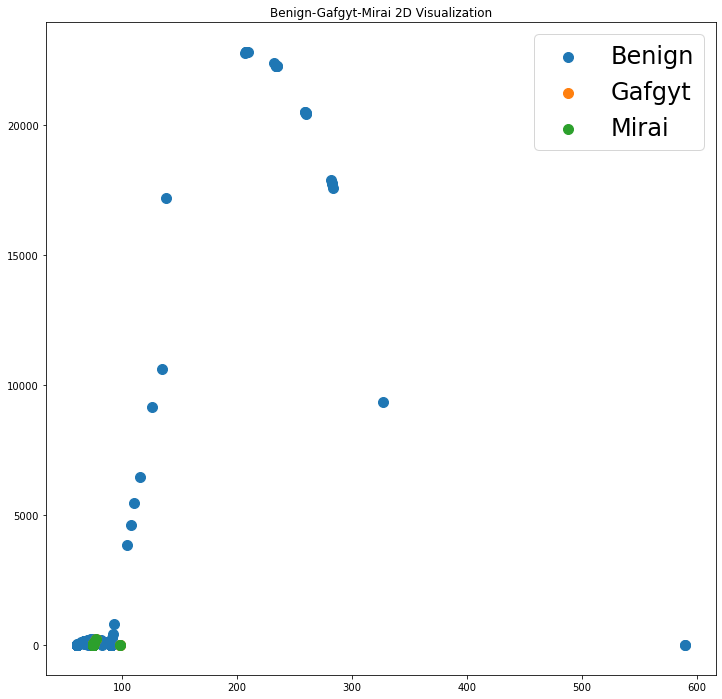

In [14]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_gafgyt[:1000], indexes=[1,2], s=100, fontsize=24)

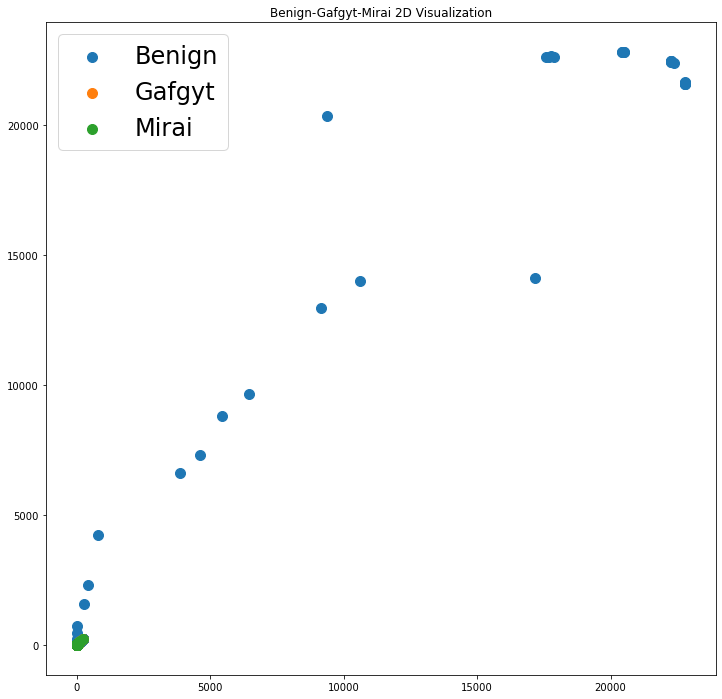

In [15]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_gafgyt[:1000], indexes=[2,5], s=100, fontsize=24)

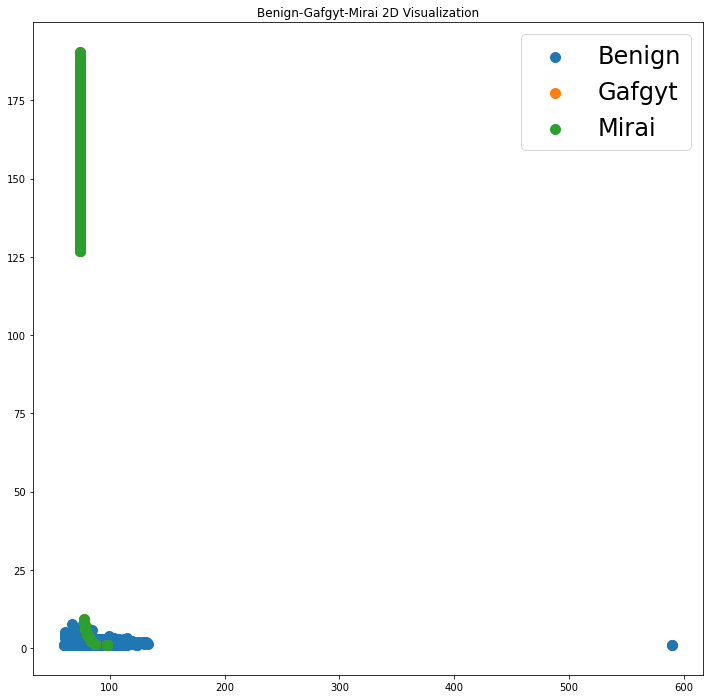

In [16]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_gafgyt[:1000], indexes=[10,15], s=100, fontsize=24)

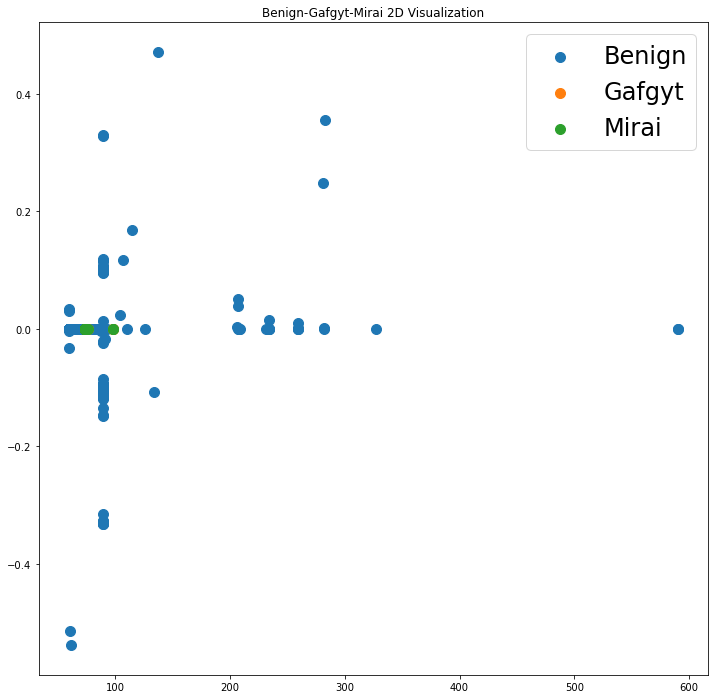

In [17]:
visualization_2d(data_benign[:1000], data_gafgyt[:1000],data_gafgyt[:1000], indexes=[1,50], s=100, fontsize=24)

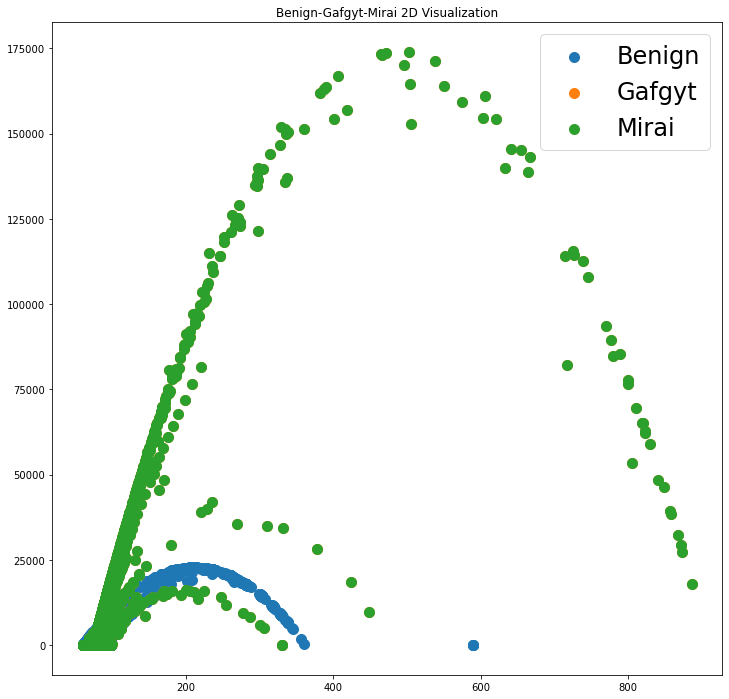

In [18]:
visualization_2d(data_benign, data_gafgyt, data_gafgyt, indexes=[1,2], s=100, fontsize=24)

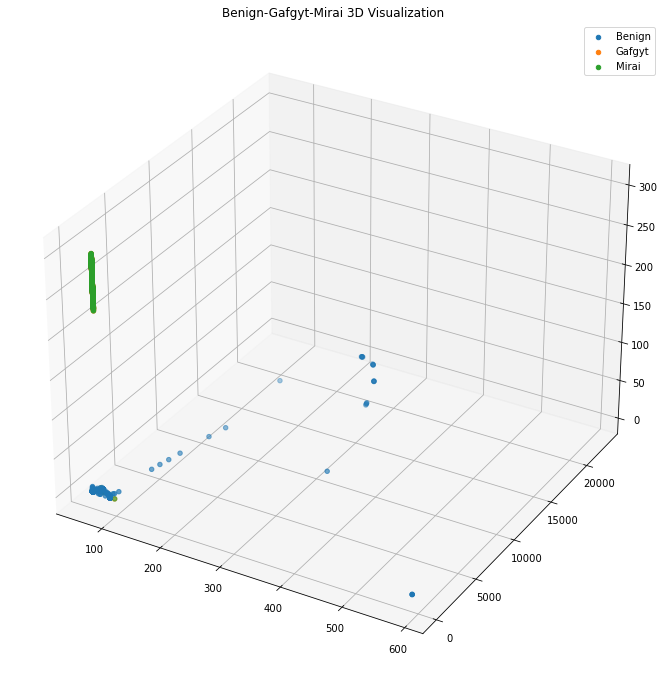

In [20]:
visualization_3d(data_benign[:1000], data_gafgyt[:1000],data_gafgyt[:1000], indexes=[1,2,3])

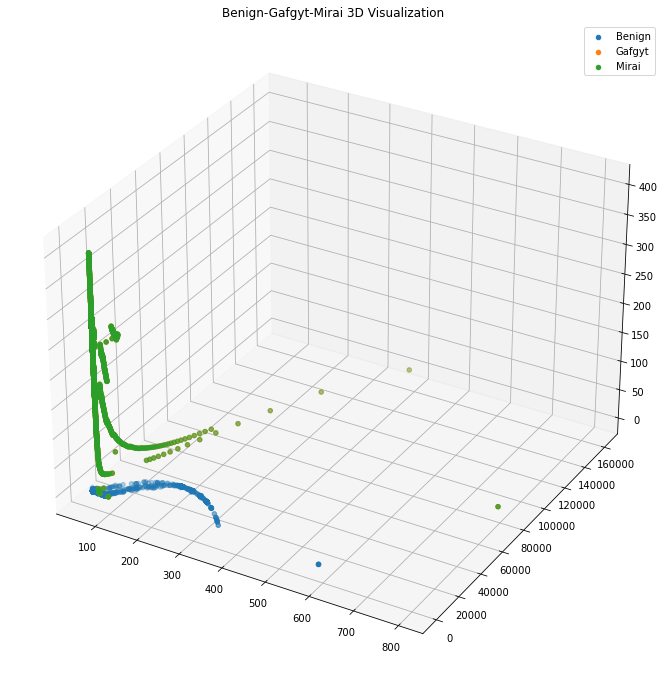

In [21]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_gafgyt[:10000], indexes=[1,2,3])

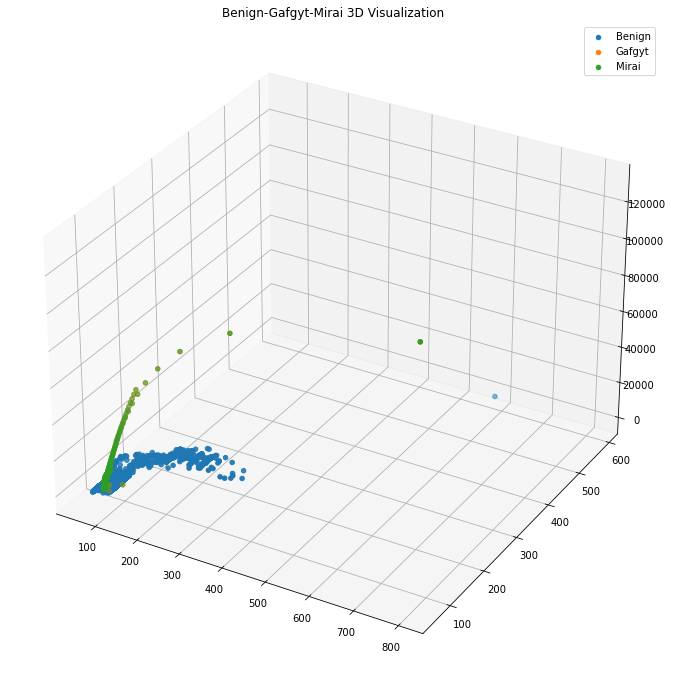

In [22]:
visualization_3d(data_benign[:10000], data_gafgyt[:10000],data_gafgyt[:10000], indexes=[1,10,20])

## Standardization

In [23]:
# Normalize


In [20]:
scaller, data_benign_standardized, _ = scale_data(X_train=data_benign)

In [21]:
data_gafgyt_standardized = scaller.transform(data_gafgyt)

In [22]:
# data_mirai_standardized = scaller.transform(data_mirai)

### Statistics

In [23]:
data_benign.min(), data_benign_standardized.min(), data_benign.max(), data_benign_standardized.max()

(-3433.96794, -1.0, 5.88e+17, 1.0)

In [24]:
data_benign.mean(), data_benign_standardized.mean()

(87370397686924.72, 0.07974181417209479)

In [25]:
data_gafgyt.min(), data_gafgyt_standardized.min(), data_gafgyt.max(), data_gafgyt_standardized.max()

(-84674.50914359995,
 -15.919509442249113,
 5.669444865125148e+17,
 672.2345519103204)

In [26]:
data_gafgyt.mean(), data_gafgyt_standardized.mean()

(549544377392246.2, 4.316449190256735)

In [27]:
# data_mirai.min(), data_mirai_standardized.min(), data_mirai.max(), data_mirai_standardized.max()

In [28]:
# data_mirai.mean(), data_mirai_standardized.mean()

In [29]:
np.median(data_gafgyt_standardized)

0.014248031501122166

In [30]:
np.median(data_benign_standardized)

0.033090475286931306

In [31]:
data_gafgyt_standardized.std()

32.64954518935781

In [32]:
data_benign_standardized.std()

0.12675688709860983

In [33]:
np.median(data_benign), np.median(data_gafgyt)

(1.9999945445, 1.0)

In [34]:
data_benign.std(), data_gafgyt.std()

(5278759709136382.0, 1.6225082724897526e+16)

### Visualization

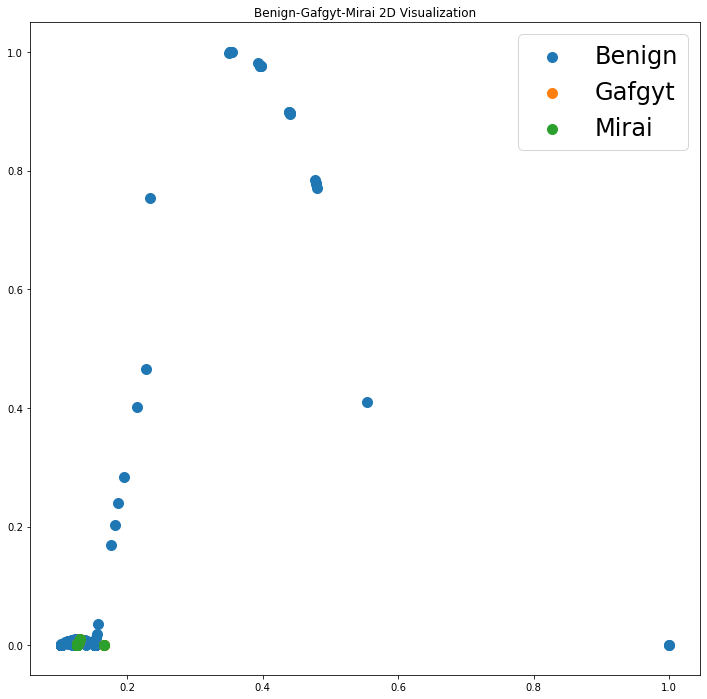

In [35]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_gafgyt_standardized[:1000], indexes=[1,2], s=100, fontsize=24)

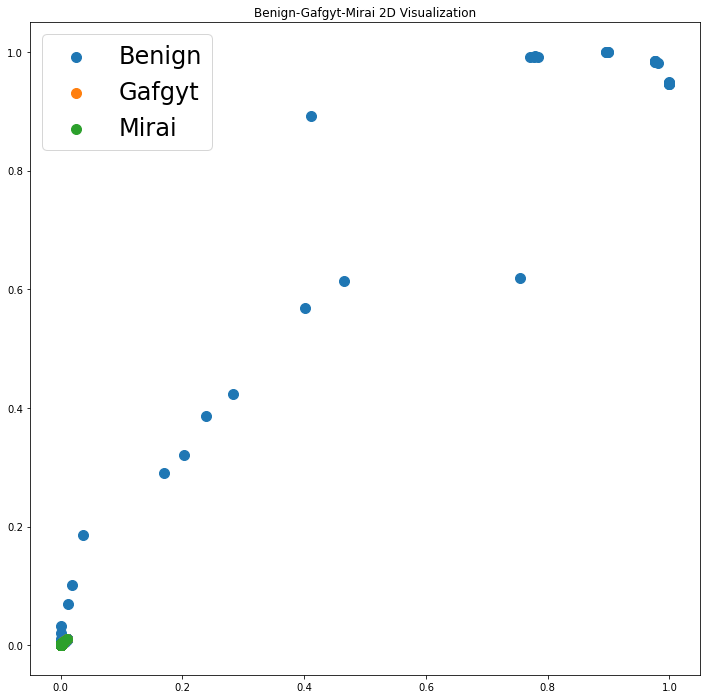

In [36]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_gafgyt_standardized[:1000], indexes=[2,5], s=100, fontsize=24)

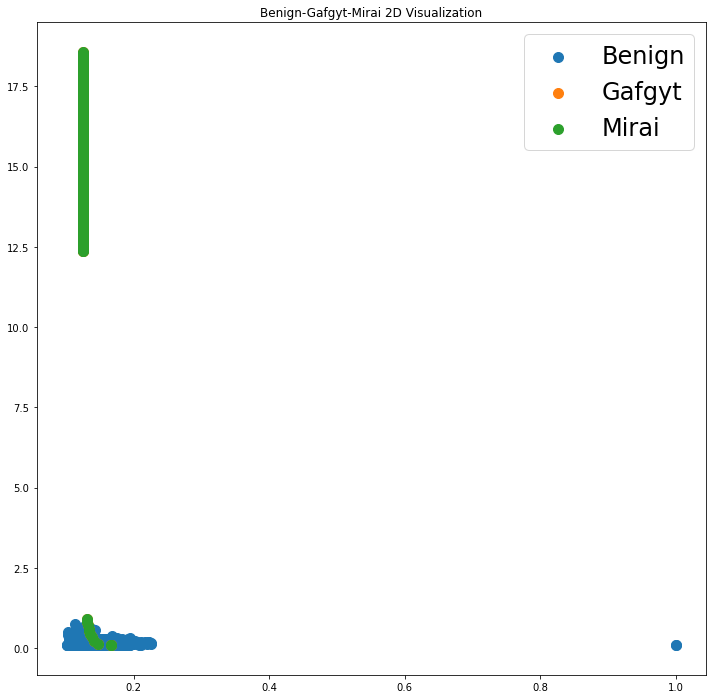

In [37]:
visualization_2d(data_benign_standardized[:1000], data_gafgyt_standardized[:1000],data_gafgyt_standardized[:1000], indexes=[10,15], s=100, fontsize=24)

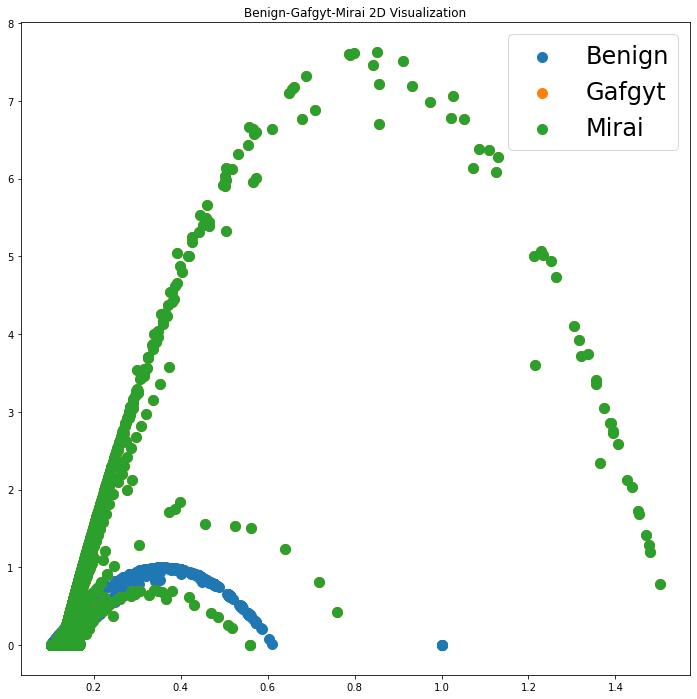

In [38]:
visualization_2d(data_benign_standardized, data_gafgyt_standardized, data_gafgyt_standardized, indexes=[1,2], s=100, fontsize=24)

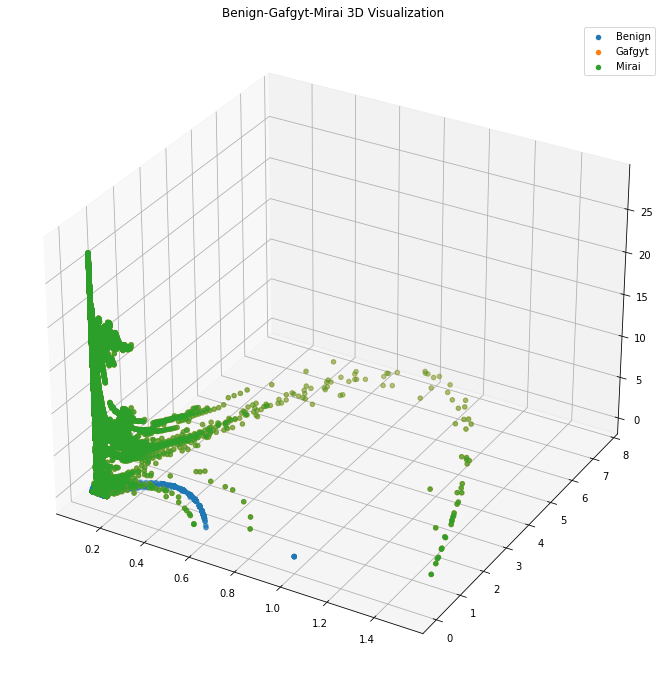

In [43]:
visualization_3d(data_benign_standardized, data_gafgyt_standardized, data_gafgyt_standardized, indexes=[1,2,3])

# Train AE

### Train on Benign

--------------Training and testing in the same device----------------
(39100, 115) (39100,)
------------Scale data-----------------
(39100, 115) (39100,)
X_train_scaled
[[9.75185635e-02 1.01694915e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.75185635e-02 1.18644068e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.75207675e-02 1.52541607e-01 3.96466406e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.94573532e-01 1.12738114e-01 1.85298567e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.76713153e-02 1.52480122e-01 4.06682569e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.95020786e-01 1.52511250e-01 2.03472154e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `ae` is used for feacture extraction (it can be `ae` or `pca`)-----------
-------------AE process-------------
Epoch 1/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0041 - val_loss: 0.0011
Epo

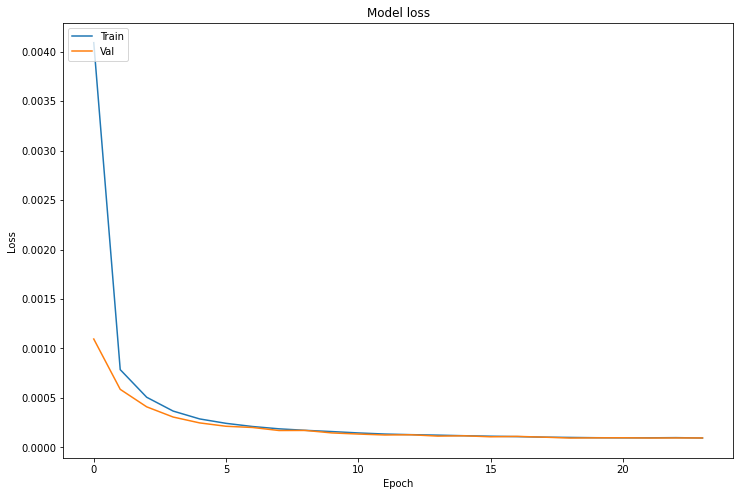

(39100, 29) (39100,)
---------Normalize data--------------
(39100, 29) (39100,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM-------------------------------------
Number of feature:  29
Hyper-parameters optimization process
Best: {'learning_rate': 1.9490490490009367, 'sigma': 8.652727515567925, 'x': 45.50551760256373}
---------SOM has been turned!-----------
Starting SOM Weights init
Perform SOM (turned) train random
1.0
Total train time: 275.11711525917053


In [44]:
_, _, _, _, encoder, _ = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='ae', num_features=29)

In [45]:
# Transform data
data_benign_encoded = encoder.predict(data_benign_standardized)
data_gafgyt_encoded = encoder.predict(data_gafgyt_standardized)
# data_mirai_encoded = encoder.predict(data_mirai_standardized)

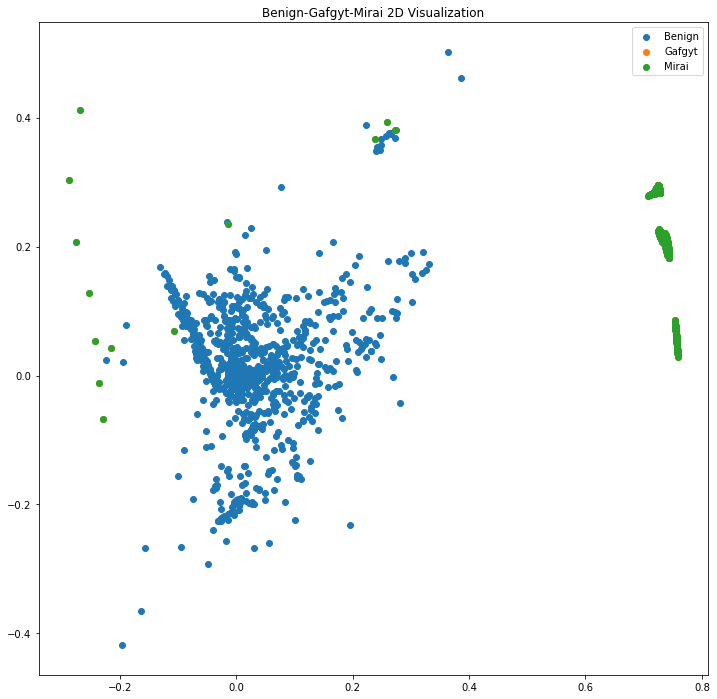

In [46]:
visualization_2d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000], data_gafgyt_encoded[:1000], indexes=[0,1])

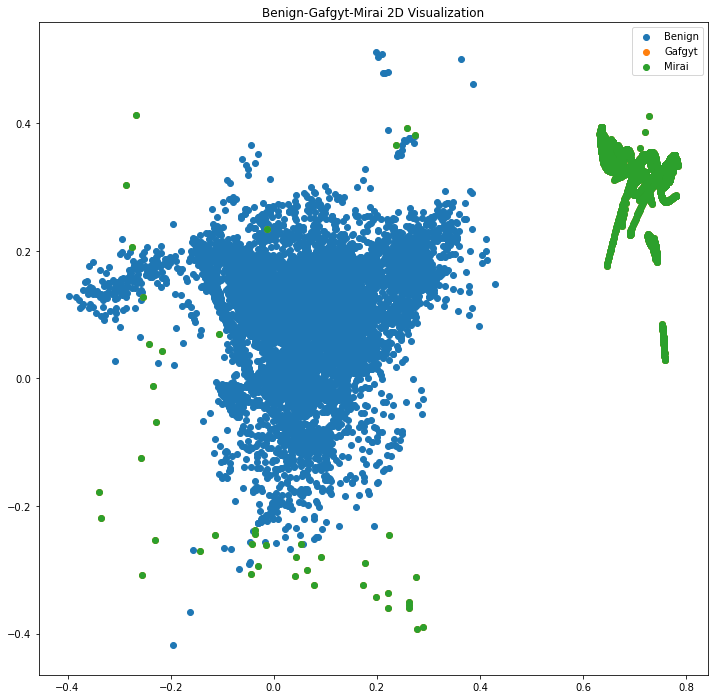

In [47]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000], data_gafgyt_encoded[:10000], indexes=[0,1])

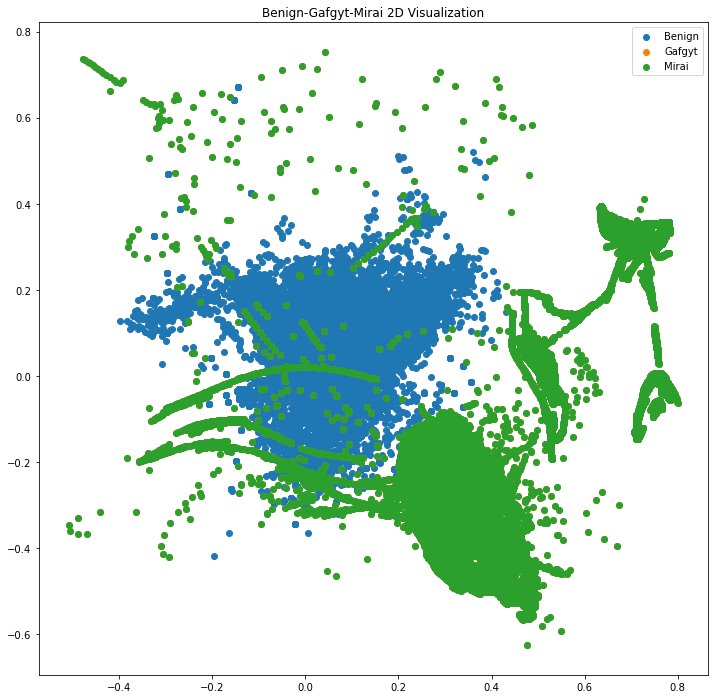

In [48]:
visualization_2d(data_benign_encoded, data_gafgyt_encoded, data_gafgyt_encoded, indexes=[0,1])

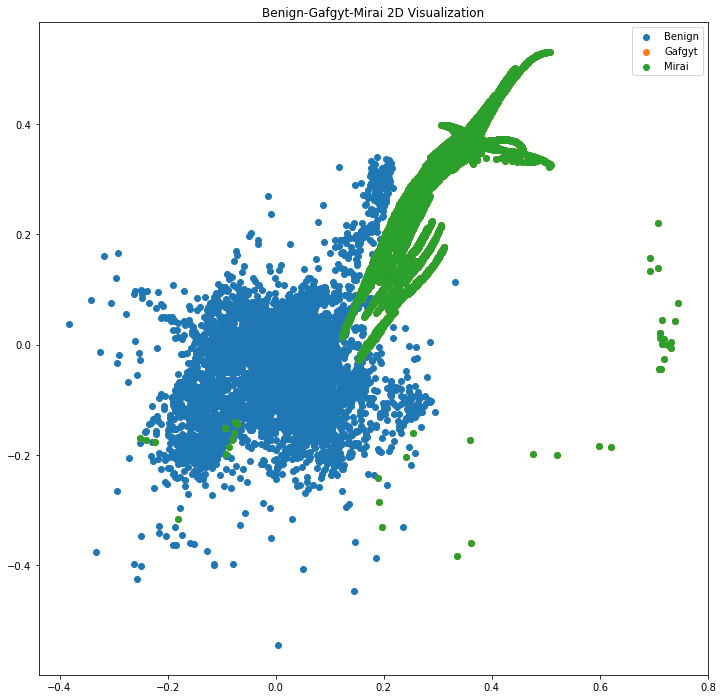

In [49]:
visualization_2d(data_benign_encoded[:10000], data_gafgyt_encoded[:10000], data_gafgyt_encoded[:10000], indexes=[10,25])

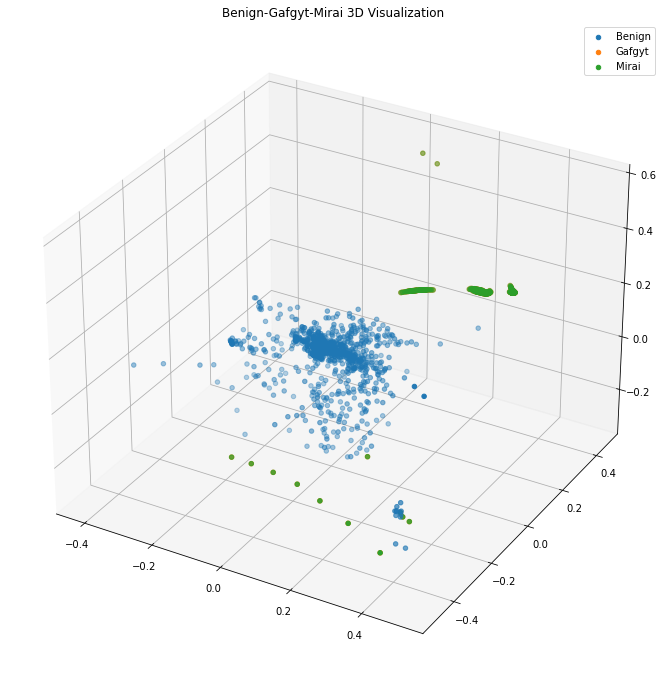

In [50]:
visualization_3d(data_benign_encoded[:1000], data_gafgyt_encoded[:1000], data_gafgyt_encoded[:1000], indexes=[1,2,3])

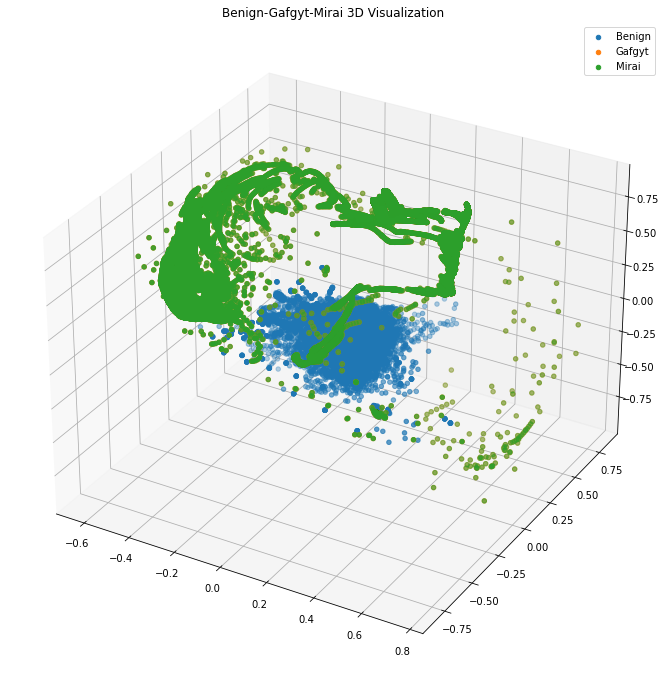

In [51]:
visualization_3d(data_benign_encoded, data_gafgyt_encoded, data_gafgyt_encoded, indexes=[1,2,3])

In [52]:
_, _, _, _, _, pca = process_train_partial(X_train=data_benign_standardized, y_train=target_benign, method='pca', num_features=29)

--------------Training and testing in the same device----------------
(39100, 115) (39100,)
------------Scale data-----------------
(39100, 115) (39100,)
X_train_scaled
[[9.75185635e-02 1.01694915e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.75185635e-02 1.18644068e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.75207675e-02 1.52541607e-01 3.96466406e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.94573532e-01 1.12738114e-01 1.85298567e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.76713153e-02 1.52480122e-01 4.06682569e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.95020786e-01 1.52511250e-01 2.03472154e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
---------Method `pca` is used for feacture extraction (it can be `ae` or `pca`)-----------
PCA process
(39100, 29) (39100,)
---------Normalize data--------------
(39100, 29) (39100,)
--------------------Train SOM on normalized data

In [53]:
data_benign_transformed = pca.transform(data_benign_standardized)
data_gafgyt_transformed = pca.transform(data_gafgyt_standardized)
# data_mirai_transformed = pca.transform(data_mirai_standardized)

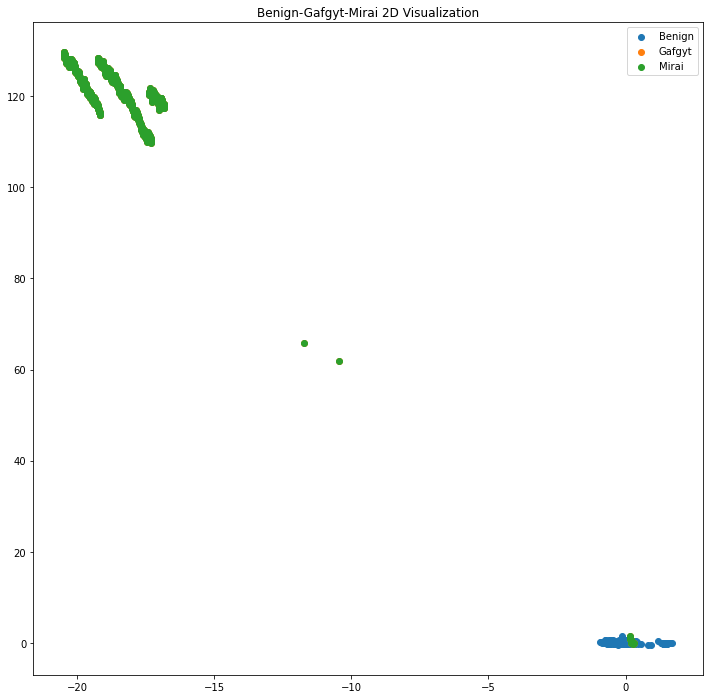

In [54]:
visualization_2d(data_benign_transformed[:1000], data_gafgyt_transformed[:1000], data_gafgyt_transformed[:1000], indexes=[1,2])

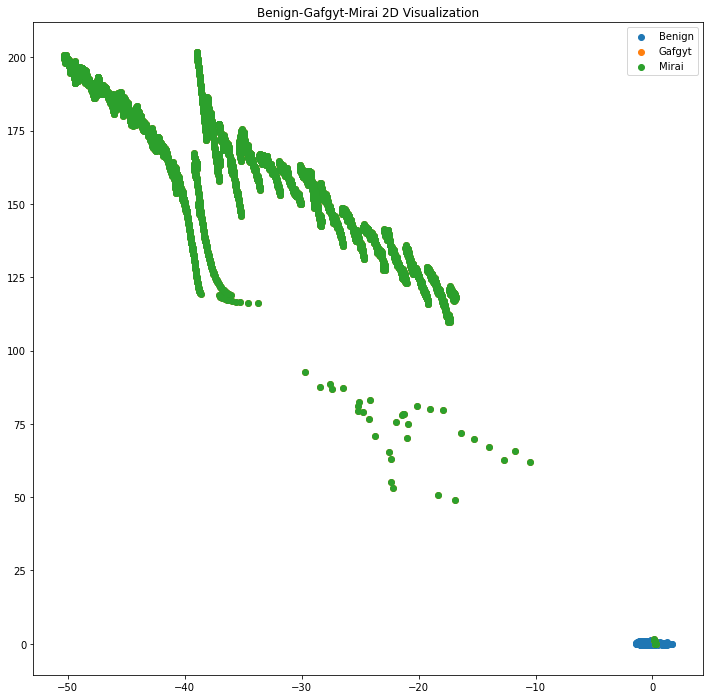

In [55]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000], data_gafgyt_transformed[:10000], indexes=[1,2])

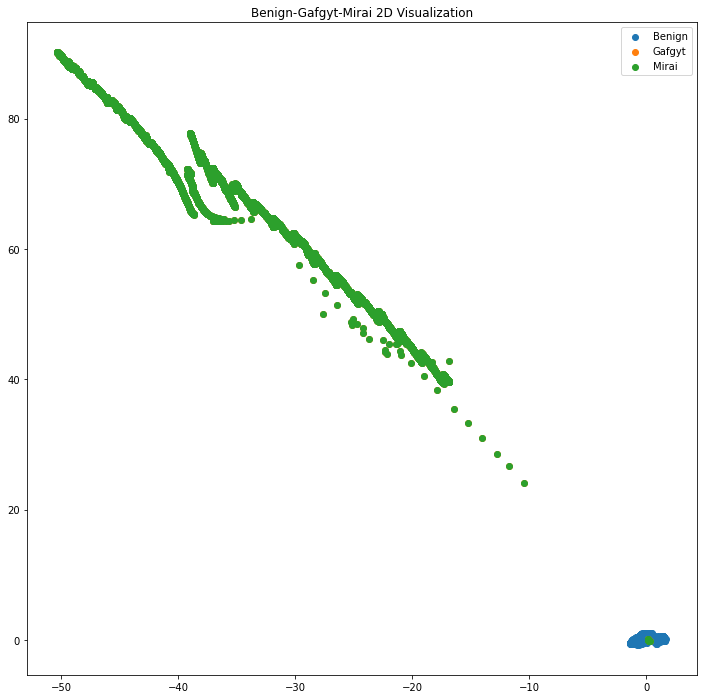

In [56]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000], data_gafgyt_transformed[:10000], indexes=[1,3])

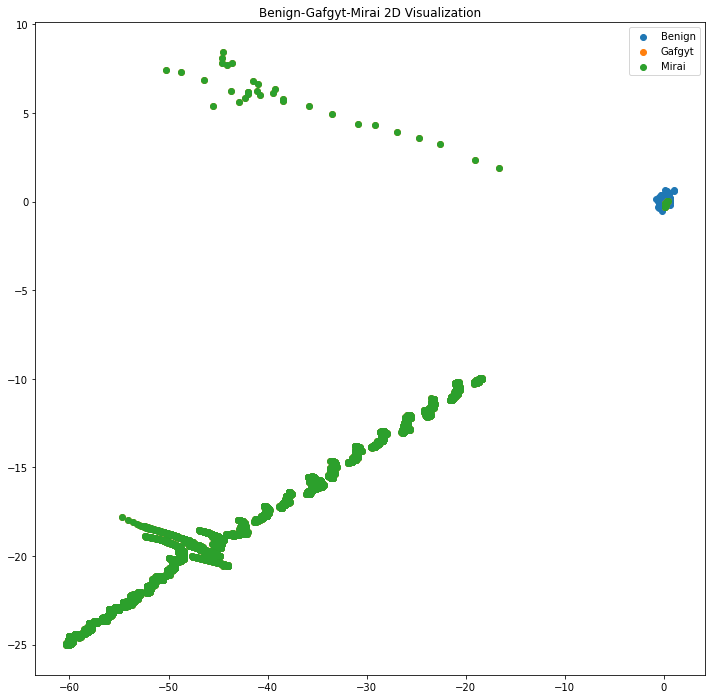

In [57]:
visualization_2d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000], data_gafgyt_transformed[:10000], indexes=[10,25])

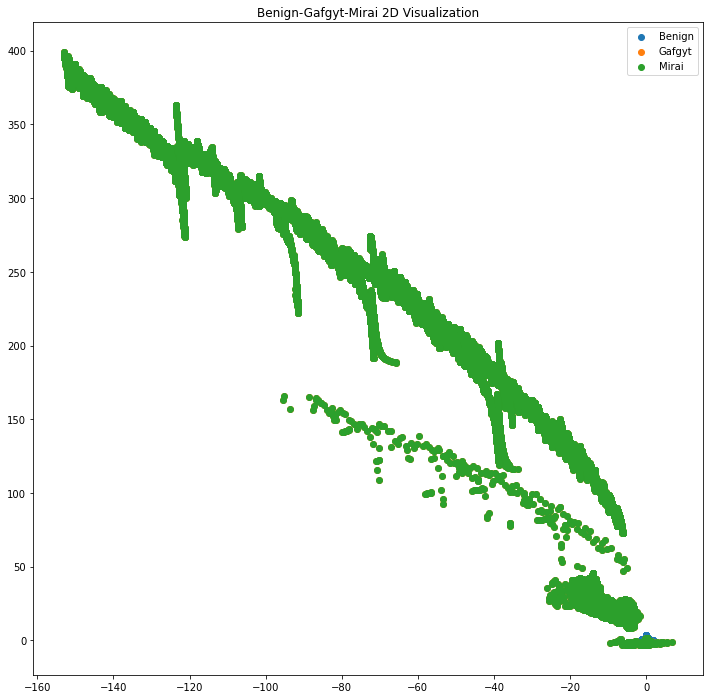

In [58]:
visualization_2d(data_benign_transformed, data_gafgyt_transformed, data_gafgyt_transformed, indexes=[1,2])

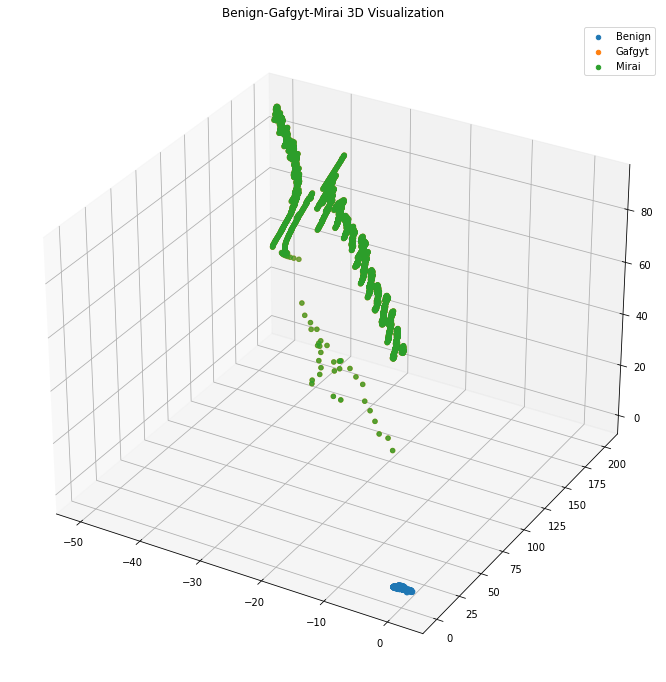

In [59]:
visualization_3d(data_benign_transformed[:10000], data_gafgyt_transformed[:10000], data_gafgyt_transformed[:10000], indexes=[1,2,3])

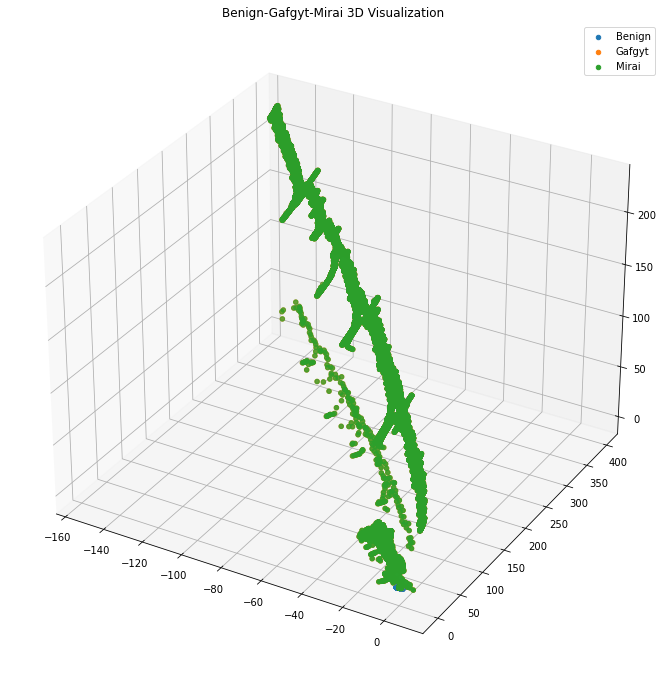

In [60]:
visualization_3d(data_benign_transformed, data_gafgyt_transformed, data_gafgyt_transformed, indexes=[1,2,3])